In [2]:
# import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np


In [3]:
path = r'C:\Users\Magsihim_AI\Desktop\Project_Statbotics\final_table.csv'

df = pd.read_csv(path)

In [4]:
df

,comp_level,event_key,match_number,set_number,score,algaePoints,autoBonusAchieved,autoCoralCount,autoCoralPoints,autoLine,...,teleopReef_trough,wallAlgaeCount,team_number,scorePenaltyFree,possition,red,blue,winning_red,winning_blue,win
0,2,0,1,1,124,32.0,False,4.0,28.0,True,...,0.0,0.0,2783,124.0,1,True,False,False,True,False
1,2,0,2,1,144,28.0,False,3.0,21.0,True,...,0.0,0.0,2783,144.0,1,True,False,False,True,False
2,0,0,1,1,129,28.0,False,3.0,21.0,True,...,5.0,2.0,5045,129.0,1,True,False,True,False,True
3,0,0,10,1,118,8.0,True,3.0,21.0,True,...,1.0,0.0,538,112.0,1,True,False,True,False,True
4,0,0,11,1,67,14.0,False,1.0,3.0,True,...,1.0,1.0,6107,61.0,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114469,1,228,1,5,64,0.0,False,1.0,3.0,True,...,6.0,0.0,9995,64.0,3,False,True,True,False,False
114470,1,228,1,6,72,0.0,False,1.0,4.0,True,...,1.0,0.0,9991,72.0,3,False,True,False,True,True
114471,1,228,1,7,77,32.0,False,1.0,3.0,True,...,0.0,0.0,9994,65.0,3,False,True,True,False,False
114472,1,228,1,8,79,0.0,False,2.0,10.0,True,...,14.0,0.0,9993,73.0,3,False,True,True,False,False


In [5]:
df[['event_key', 'match_number', 'comp_level', 'set_number']].value_counts().value_counts()

count
6    19079
Name: count, dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include=['number', 'bool'])

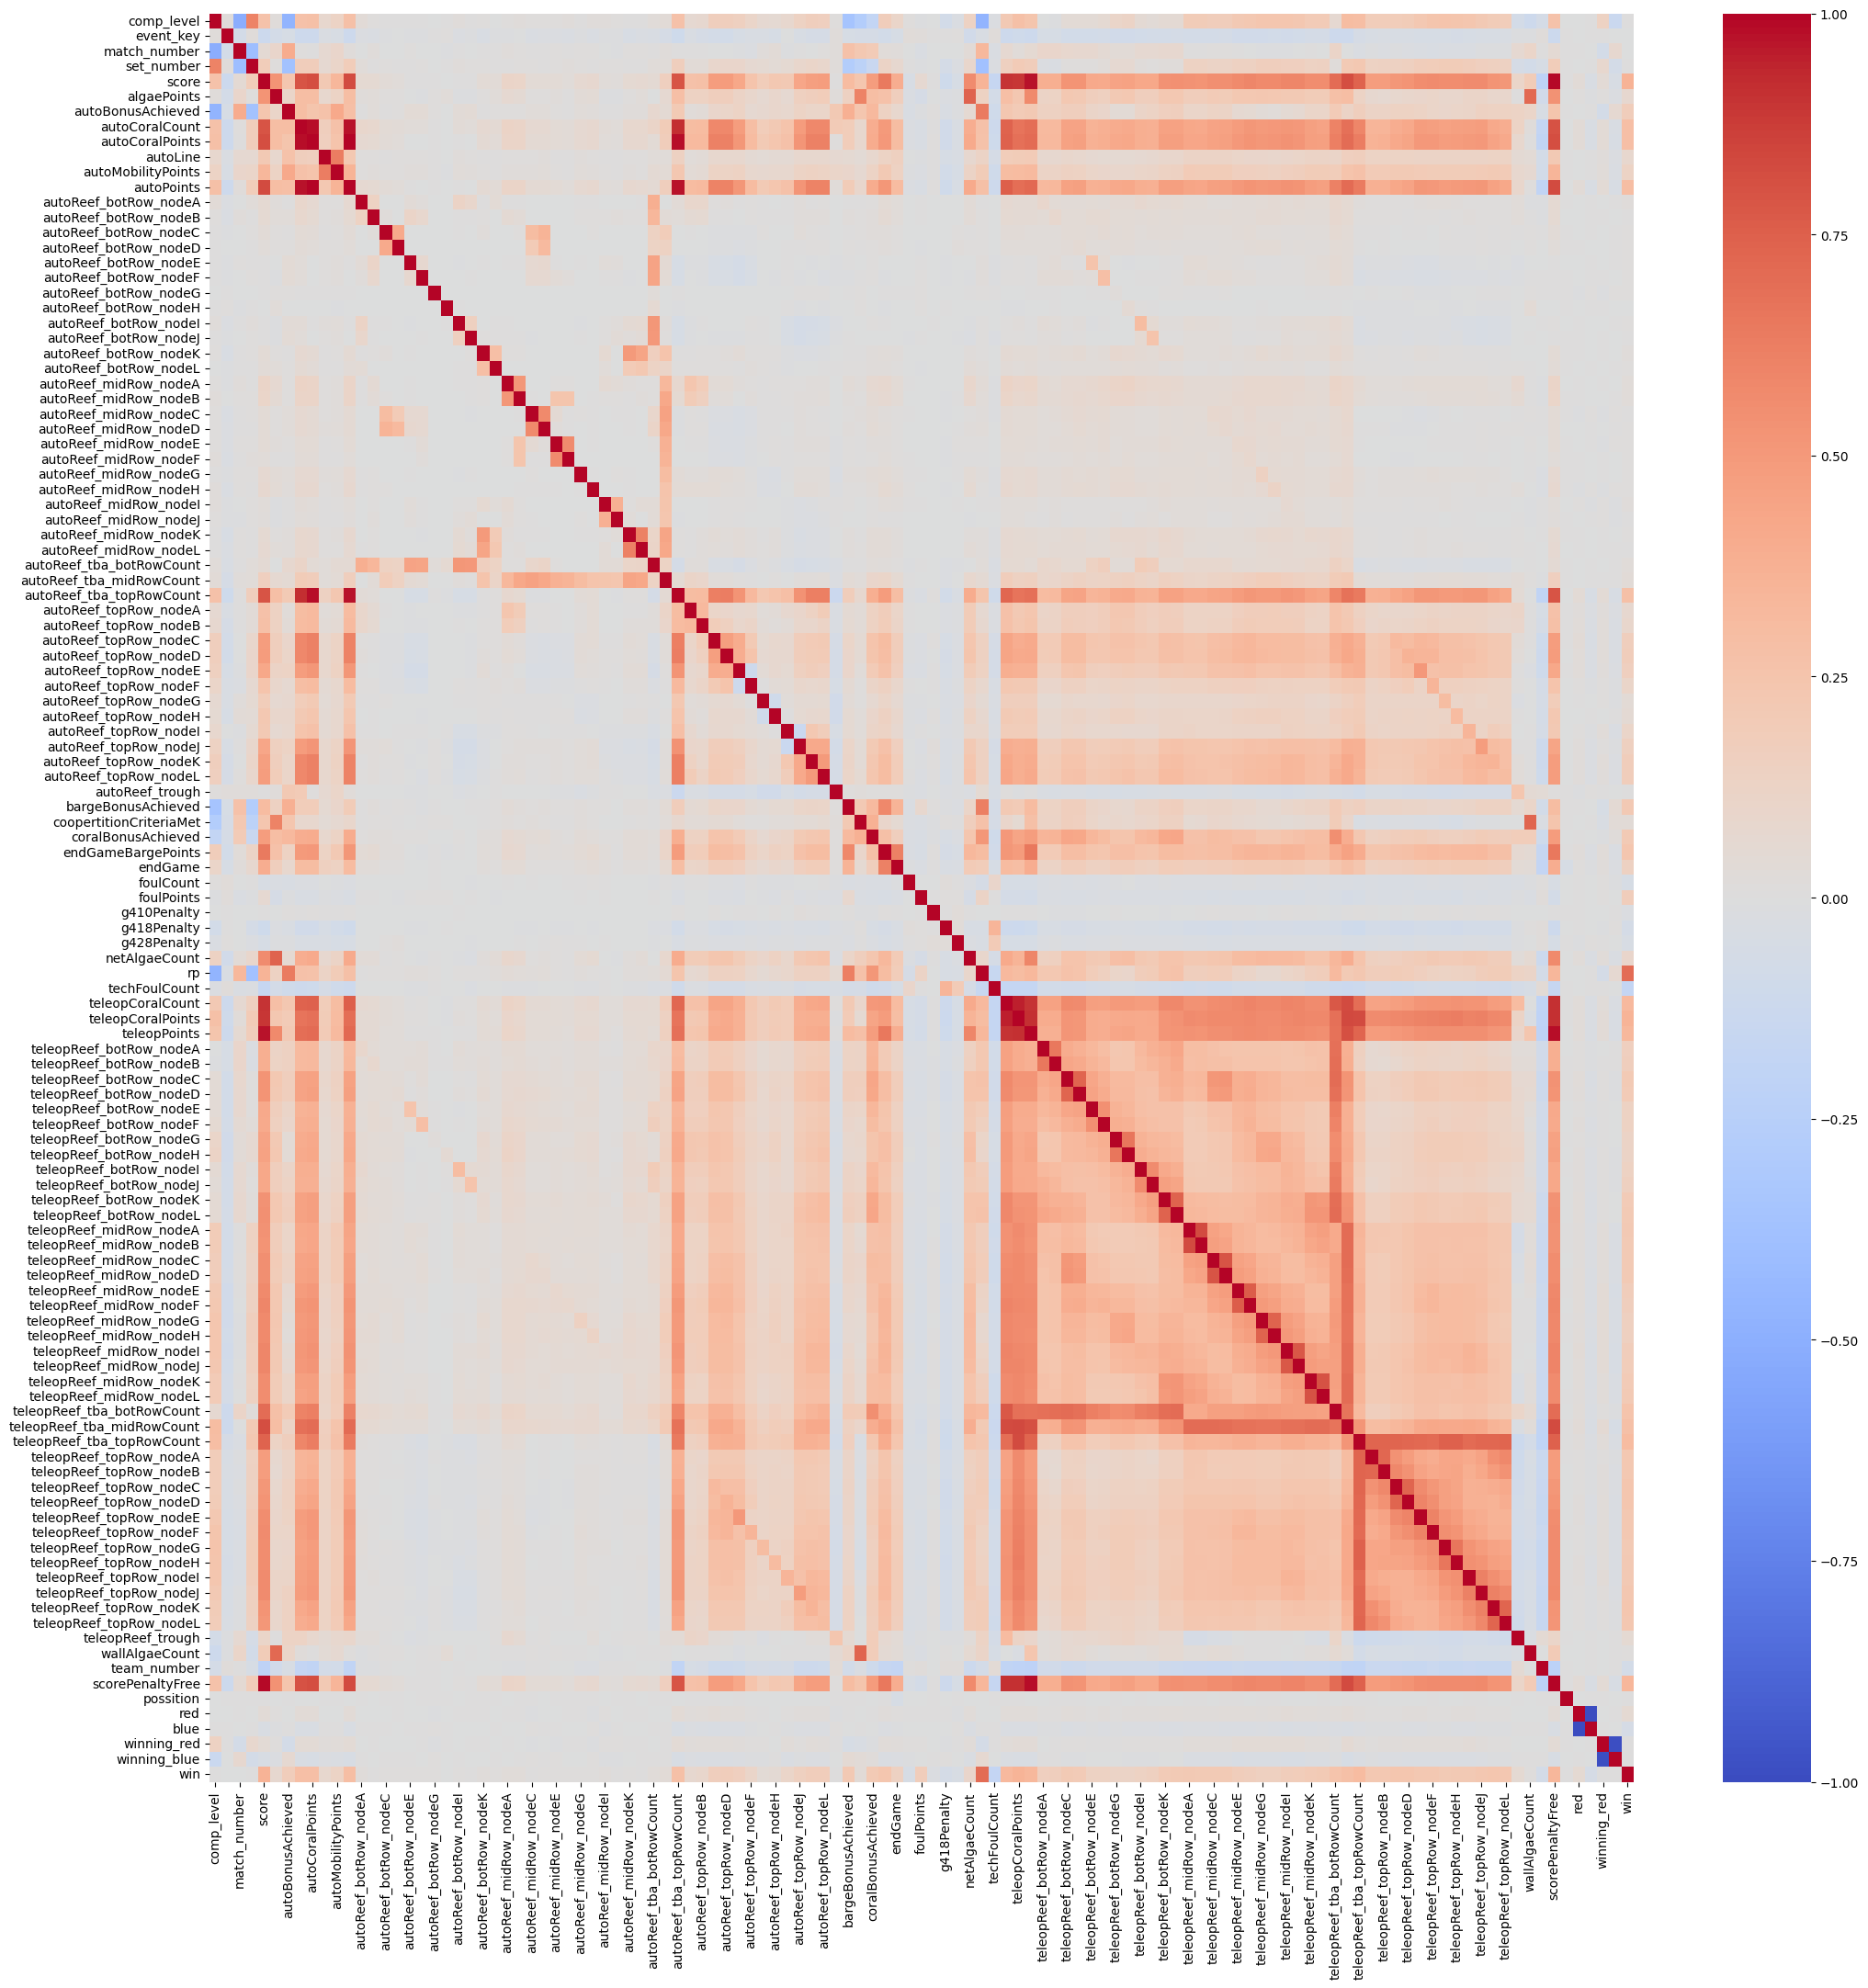

In [7]:
plt.figure(figsize = (25, 25))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", vmin=-1)
plt.show()

In [8]:
df.shape

(114474, 117)

In [9]:
pd.set_option("display.max_info_columns", 200)

In [10]:
dfinfo = pd.DataFrame({
    "column": df.columns,
    "non_nulls": df.notnull().sum().values,
    "dtype": df.dtypes.values
})

In [11]:
dfinfo

,column,non_nulls,dtype
0,comp_level,114474,int64
1,event_key,114474,int64
2,match_number,114474,int64
3,set_number,114474,int64
4,score,114474,int64
...,...,...,...
112,red,114474,bool
113,blue,114474,bool
114,winning_red,114474,bool
115,winning_blue,114474,bool


In [12]:
target_col = "win"

correlations = df.corr(numeric_only=True)[target_col]

corr_df = correlations.reset_index()
corr_df.columns = ["feature", "correlation_with_target"]


In [13]:
corr_df.sort_values(by="correlation_with_target", ascending=False, inplace=False).head(40)


,feature,correlation_with_target
116,win,1.000000
63,rp,0.701061
4,score,0.365758
66,teleopCoralPoints,0.351715
110,scorePenaltyFree,0.341466
67,teleopPoints,0.332806
65,teleopCoralCount,0.321080
94,teleopReef_tba_topRowCount,0.310224
11,autoPoints,0.291519
8,autoCoralPoints,0.286638


In [23]:
df

,comp_level,event_key,match_number,set_number,score,algaePoints,autoBonusAchieved,autoCoralCount,autoCoralPoints,autoLine,...,teleopReef_trough,wallAlgaeCount,team_number,scorePenaltyFree,possition,red,blue,winning_red,winning_blue,win
0,2,0,1,1,124,32.0,False,4.0,28.0,True,...,0.0,0.0,2783,124.0,1,True,False,False,True,False
1,2,0,2,1,144,28.0,False,3.0,21.0,True,...,0.0,0.0,2783,144.0,1,True,False,False,True,False
2,0,0,1,1,129,28.0,False,3.0,21.0,True,...,5.0,2.0,5045,129.0,1,True,False,True,False,True
3,0,0,10,1,118,8.0,True,3.0,21.0,True,...,1.0,0.0,538,112.0,1,True,False,True,False,True
4,0,0,11,1,67,14.0,False,1.0,3.0,True,...,1.0,1.0,6107,61.0,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114469,1,228,1,5,64,0.0,False,1.0,3.0,True,...,6.0,0.0,9995,64.0,3,False,True,True,False,False
114470,1,228,1,6,72,0.0,False,1.0,4.0,True,...,1.0,0.0,9991,72.0,3,False,True,False,True,True
114471,1,228,1,7,77,32.0,False,1.0,3.0,True,...,0.0,0.0,9994,65.0,3,False,True,True,False,False
114472,1,228,1,8,79,0.0,False,2.0,10.0,True,...,14.0,0.0,9993,73.0,3,False,True,True,False,False


C:\Users\Magsihim_AI\AppData\Local\Temp\ipykernel_20024\3032740337.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


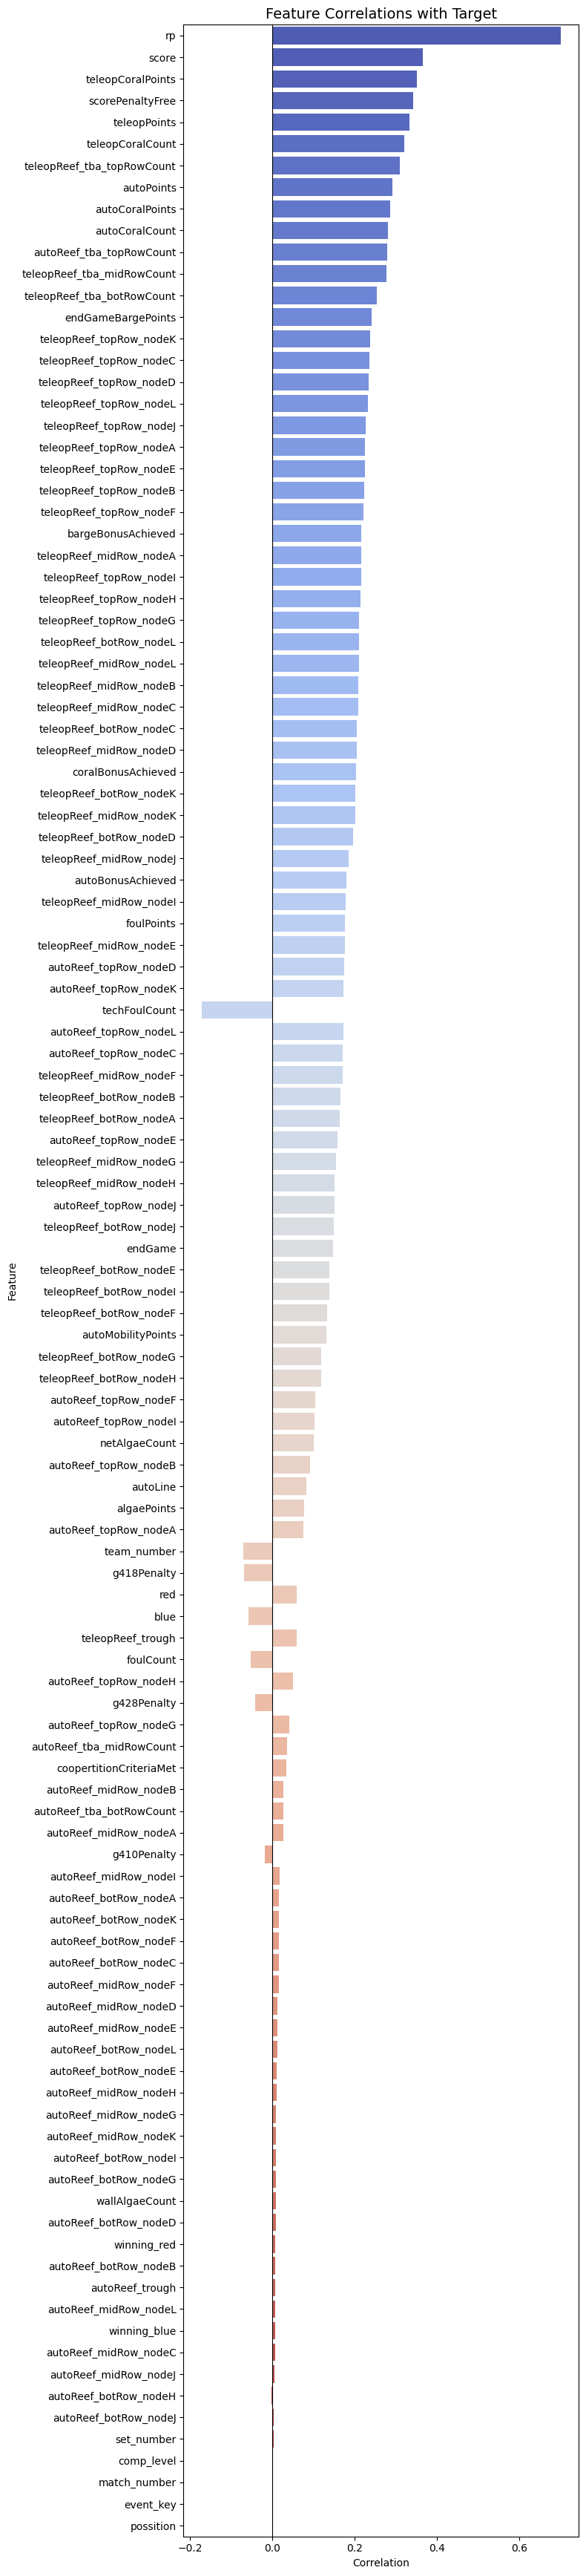

In [16]:
# correlations with target
correlations = df.corr(numeric_only=True)["win"].drop("win")  # drop self-correlation
corr_df = correlations.to_frame().reset_index()
corr_df.columns = ["Feature", "Correlation"]

# sort by absolute correlation
corr_df = corr_df.reindex(corr_df["Correlation"].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, len(corr_df) * 0.3))
sns.barplot(
    data=corr_df,
    y="Feature", x="Correlation",
    palette="coolwarm"
)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Feature Correlations with Target", fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
df

,comp_level,event_key,match_number,set_number,score,algaePoints,autoBonusAchieved,autoCoralCount,autoCoralPoints,autoLine,...,teleopReef_trough,wallAlgaeCount,team_number,scorePenaltyFree,possition,red,blue,winning_red,winning_blue,win
0,2,0,1,1,124,32.0,False,4.0,28.0,True,...,0.0,0.0,2783,124.0,1,True,False,False,True,False
1,2,0,2,1,144,28.0,False,3.0,21.0,True,...,0.0,0.0,2783,144.0,1,True,False,False,True,False
2,0,0,1,1,129,28.0,False,3.0,21.0,True,...,5.0,2.0,5045,129.0,1,True,False,True,False,True
3,0,0,10,1,118,8.0,True,3.0,21.0,True,...,1.0,0.0,538,112.0,1,True,False,True,False,True
4,0,0,11,1,67,14.0,False,1.0,3.0,True,...,1.0,1.0,6107,61.0,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114469,1,228,1,5,64,0.0,False,1.0,3.0,True,...,6.0,0.0,9995,64.0,3,False,True,True,False,False
114470,1,228,1,6,72,0.0,False,1.0,4.0,True,...,1.0,0.0,9991,72.0,3,False,True,False,True,True
114471,1,228,1,7,77,32.0,False,1.0,3.0,True,...,0.0,0.0,9994,65.0,3,False,True,True,False,False
114472,1,228,1,8,79,0.0,False,2.0,10.0,True,...,14.0,0.0,9993,73.0,3,False,True,True,False,False
